In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_yaml_path = '/content/drive/MyDrive/Dataset_Balatro.v4i.yolov11/data.yaml'

if os.path.exists(dataset_yaml_path):
    print(f"Contents of {dataset_yaml_path}:")
    with open(dataset_yaml_path, 'r') as f:
        print(f.read())
else:
    print(f"The file {dataset_yaml_path} does not exist.")

Contents of /content/drive/MyDrive/Dataset_Balatro.v4i.yolov11/data.yaml:
train: ./train/images
val: ./train/images
test: ./train/images

nc: 63
names: ['10_Corazon', '10_Diamante', '10_Pica', '10_Trebol', '10_Versatil', '2_Corazon', '2_Diamante', '2_Pica', '2_Trebol', '3_Corazon', '3_Diamante', '3_Pica', '3_Trebol', '3_Versatil', '4_Corazon', '4_Diamante', '4_Pica', '4_Trebol', '4_Versatil', '5_Corazon', '5_Diamante', '5_Pica', '5_Trebol', '5_Versatil', '6_Corazon', '6_Diamante', '6_Pica', '6_Trebol', '6_Versatil', '7_Corazon', '7_Diamante', '7_Pica', '7_Trebol', '8_Corazon', '8_Diamante', '8_Pica', '8_Trebol', '8_Versatil', '9_Corazon', '9_Diamante', '9_Pica', '9_Trebol', 'As_Corazon', 'As_Diamante', 'As_Pica', 'As_Trebol', 'As_Versatil', 'Carta_Piedra', 'Carta_Volteada', 'J_Corazon', 'J_Diamante', 'J_Pica', 'J_Trebol', 'K_Corazon', 'K_Diamante', 'K_Pica', 'K_Trebol', 'K_Versatil', 'Q_Corazon', 'Q_Diamante', 'Q_Pica', 'Q_Trebol', 'Q_Versatil']

roboflow:
  workspace: opa-dmvgf
  proj

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO

dataset_yaml_path = '/content/drive/MyDrive/Dataset_Balatro.v4i.yolov11/data.yaml'

# Read the original data.yaml content
with open(dataset_yaml_path, 'r') as f:
    lines = f.readlines()

# Modify the paths for train, val, and test
modified_lines = []
for line in lines:
    if line.startswith('train:'):
        modified_lines.append('train: ./train/images\n')
    elif line.startswith('val:'):
        # Temporarily use train for validation if 'valid' is missing
        modified_lines.append('val: ./train/images\n')
    elif line.startswith('test:'):
        # Temporarily use train for testing if 'test' is missing
        modified_lines.append('test: ./train/images\n')
    else:
        modified_lines.append(line)

# Write the modified content back to data.yaml
with open(dataset_yaml_path, 'w') as f:
    f.writelines(modified_lines)

print(f"Modified {dataset_yaml_path} to use relative paths and point val/test to train.")

# Cargar modelo pequeño (Nano) para velocidad
model = YOLO('yolov8n.pt')

# Entrenar usando la GPU (device=0)
model.train(
    data=dataset_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    device=0
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Modified /content/drive/MyDrive/Dataset_Balatro.v4i.yolov11/data.yaml to use relative paths and point val/test to train.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dataset_Balatro.v4i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e4e41f6cb90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,017,933 parameters, 0 gradients, 8.2 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 31.8±12.8 MB/s, size: 53.2 KB)
val: Scanning /content/drive/MyDrive/Dataset_Balatro.v4i.yolov11/train/labels.cache... 753 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 753/753 1.4Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 24, len(boxes) = 5612. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 48/48 3.6it/s 13.3s
                   all        753       5612      0.942       0.79      0.848       0.79
            10_Corazon        112        112      0.957      0.988      0.993      0.926
           10

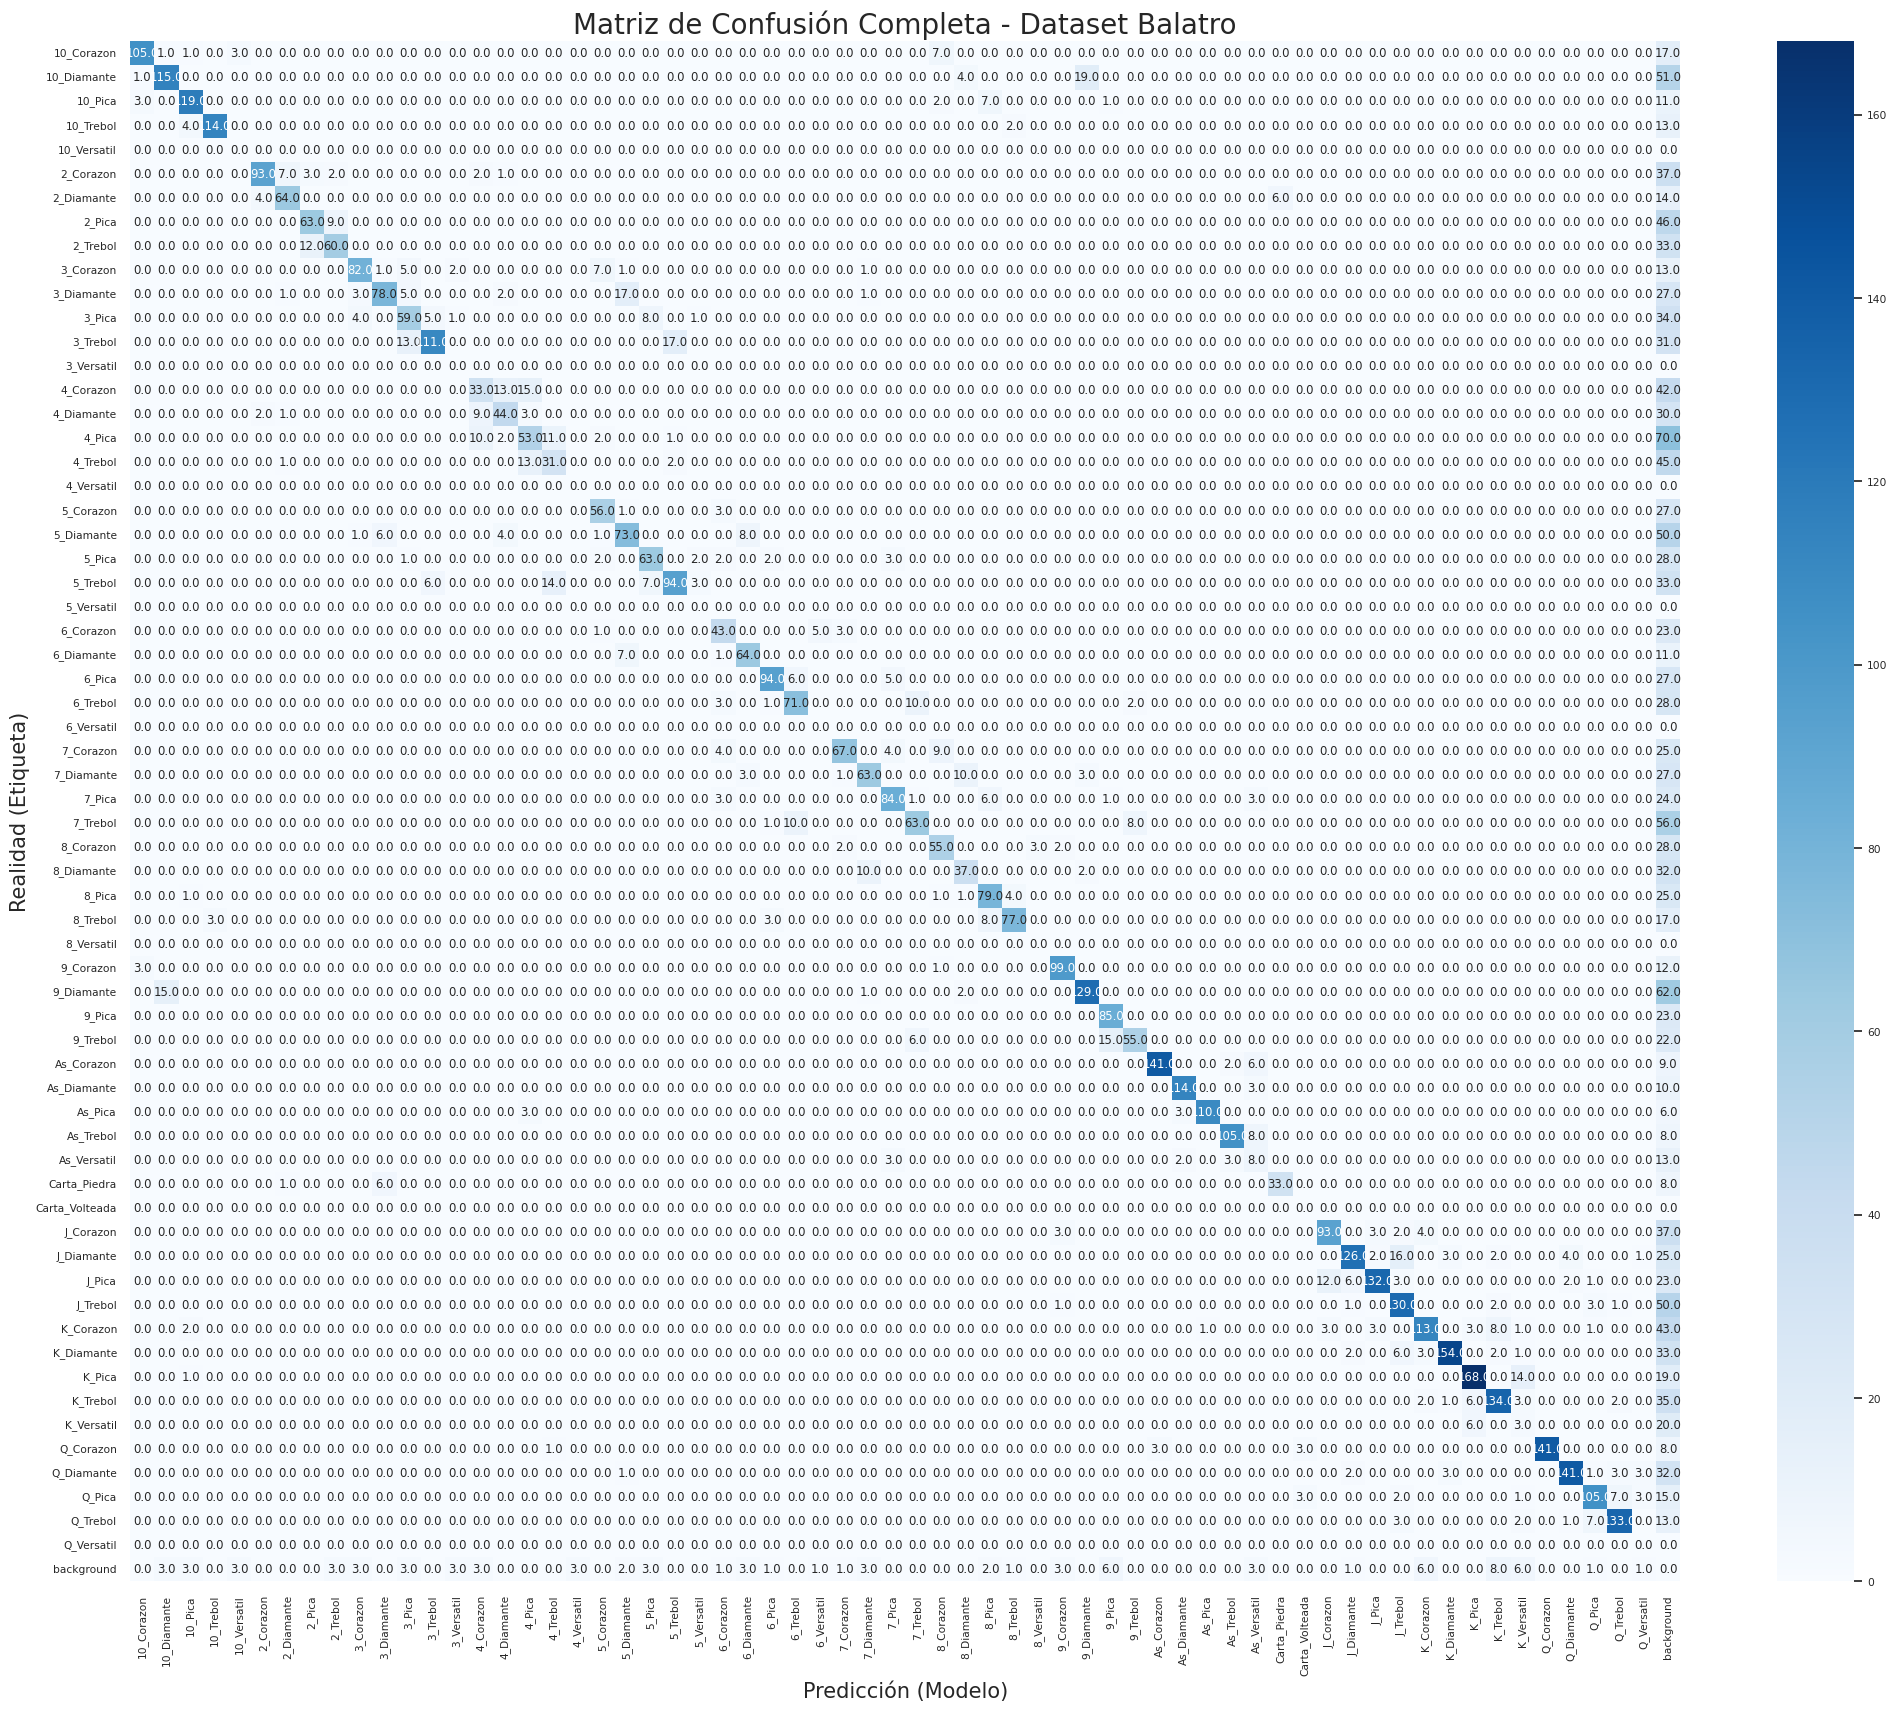

Matriz guardada como 'matriz_gigante_balatro.png'. Puedes descargarla desde la carpeta de archivos.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

# 1. Cargar el modelo entrenado
model = YOLO('/content/runs/detect/train/weights/best.pt')

# 2. Obtener la matriz de confusión de los resultados de validación
results = model.val()
confusion_matrix = results.confusion_matrix.matrix

# 3. Preparar los nombres de las clases (incluyendo 'background')
names = list(model.names.values())
names_with_bg = names + ['background']

# 4. Crear el gráfico de la matriz a gran escala
plt.figure(figsize=(25, 20)) # Tamaño gigante para que quepan las 52 clases
sns.set(font_scale=0.7)

sns.heatmap(
    confusion_matrix,
    annot=True,      # Muestra los números dentro de los cuadros
    fmt='.1f',       # Un decimal
    cmap='Blues',    # Color azul
    xticklabels=names_with_bg,
    yticklabels=names_with_bg,
    cbar=True
)

plt.title('Matriz de Confusión Completa - Dataset Balatro', fontsize=20)
plt.xlabel('Predicción (Modelo)', fontsize=15)
plt.ylabel('Realidad (Etiqueta)', fontsize=15)

# Guardar en alta calidad para que puedas descargarla y verla bien
plt.savefig('matriz_gigante_balatro.png', dpi=300, bbox_inches='tight')
plt.show()

print("Matriz guardada como 'matriz_gigante_balatro.png'. Puedes descargarla desde la carpeta de archivos.")